In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
df = pd.get_dummies(data=df, columns=['smoker','sex', 'region'], drop_first=True)

In [8]:
df.head(3)

,age,bmi,children,charges,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,0,1,0
2,28,33.00,3,4449.4620,0,1,0,1,0


In [9]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
smoker_yes          0
sex_male            0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

In [11]:
# train-test 70-30 split
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [12]:
train_x = df_train[['age']]
train_y = df_train[['charges']]
test_x = df_test[['age']]
test_y = df_test[['charges']]

lr = linear_model.LinearRegression()
lr_model = lr.fit(train_x, train_y)

predictions = lr_model.predict(test_x)
df_test['slr_result'] = predictions

slr_error = test_y - predictions
df_test['slr_error'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y.values) ** 2))
print("R2-score: %.2f" % r2_score(test_y.values , predictions) )

Slope:  [[267.74014088]]
Intercept:  [2707.05183709]
Mean absolute error: 9031.80
Residual sum of squares (MSE): 134798778.07
R2-score: 0.07


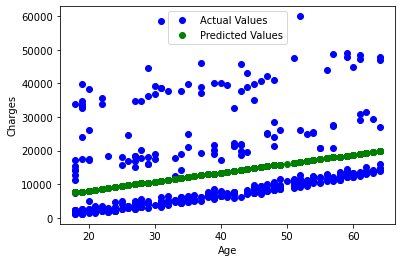

In [13]:
plt.plot(df_test['age'], test_y,'bo',label='Actual Values')
plt.plot(df_test['age'], predictions,'go',label='Predicted Values')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

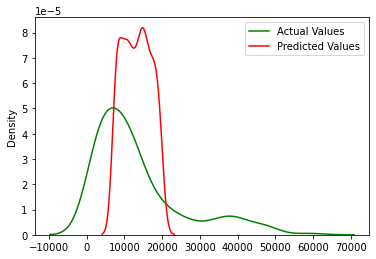

In [14]:
sns.distplot(test_y, hist=False, color="g", label="Actual Values")
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" )
plt.legend()

<AxesSubplot:ylabel='slr_error'>

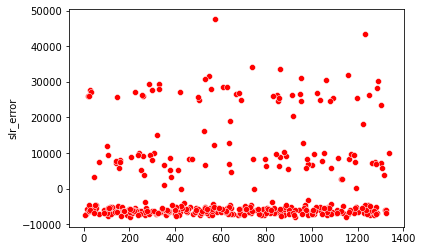

In [15]:
sns.scatterplot(x=test_y.index,y='slr_error',data=df_test,color="r")

In [16]:
# train-test 70-30 split
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [17]:
train_x =df_train.drop(['charges'], axis=1)
train_y =df_train[['charges']]
test_x =df_test.drop(['charges'], axis=1)
test_y =df_test[['charges']]

lr = linear_model.LinearRegression()
scores = cross_val_score(lr, train_x, train_y, scoring='r2', cv=5)

print(scores)
print(scores.mean())

lr.fit(train_x, train_y)
predictions = lr.predict(test_x)
df_test['mlr_result'] = predictions

slr_error = test_y - predictions
df_test['mlr_error'] = slr_error

print ('Slope: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y.values) ** 2))
print("R2-score: %.2f" % r2_score(test_y.values , predictions) )

[0.6110683  0.78922592 0.70731277 0.71557971 0.74722007]
0.7140813555600263
Slope:  [[ 2.60023521e+02  2.89695143e+02  4.72426567e+02  2.39903237e+04
  -6.20687987e-02 -7.55408565e+02 -9.41403222e+02 -1.60171412e+03]]
Intercept:  [-10259.16534195]
Mean absolute error: 3943.24
Residual sum of squares (MSE): 32345536.75
R2-score: 0.78


In [20]:
pd.DataFrame({"Feature_Name": train_x.columns, "Coef.": lr.coef_.flatten()})

,Feature_Name,Coef.
0,age,260.023521
1,bmi,289.695143
2,children,472.426567
3,smoker_yes,23990.323732
4,sex_male,-0.062069
5,region_northwest,-755.408565
6,region_southeast,-941.403222
7,region_southwest,-1601.714124


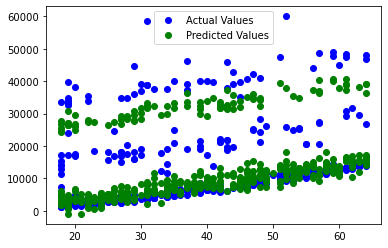

In [22]:
plt.plot(df_test['age'], test_y,'bo',label='Actual Values')
plt.plot(df_test['age'], predictions,'go',label='Predicted Values')
plt.legend()

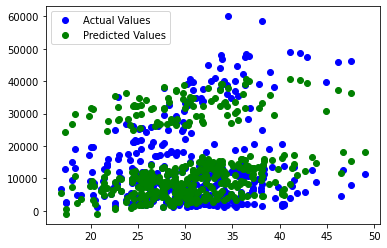

In [ ]:
plt.plot(df_test['bmi'], test_y,'bo',label='Actual Values')
plt.plot(df_test['bmi'], predictions,'go',label='Predicted Values')
plt.legend()

<AxesSubplot:ylabel='Density'>

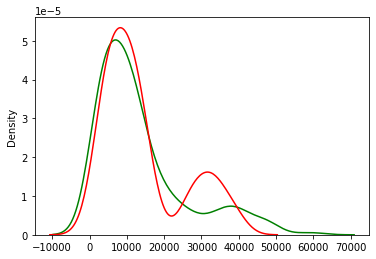

In [ ]:
sns.distplot(test_y, hist=False, color="g", label="Actual Values")
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" )

<AxesSubplot:ylabel='mlr_error'>

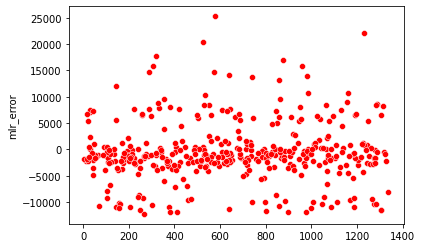

In [ ]:
sns.scatterplot(x=test_y.index,y='mlr_error',data=df_test,color="r")

In [23]:
# train-test 70-30 split
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [24]:
x =df_train.drop(['charges'], axis=1)
y =df_train[['charges']]
lr = linear_model.LinearRegression()

scores = []
degree = list(range(2,5))
for n in degree:
    pr = PolynomialFeatures(degree=n)
    x_pr = pr.fit_transform(x)
    print("Degree:", n, ", Shape:", x_pr.shape)
    lr.fit(x_pr, y)
    scores.append(lr.score(x_pr, y))
    

Degree: 2 , Shape: (936, 45)
Degree: 3 , Shape: (936, 165)
Degree: 4 , Shape: (936, 495)


Text(0.5, 1.0, 'Degree Vs. R2-score')

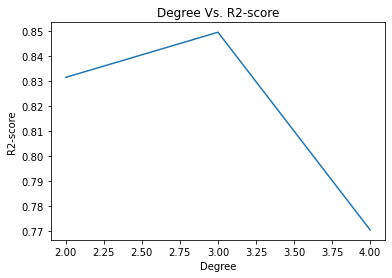

In [25]:
degree_score_df = pd.DataFrame()
degree_score_df['Degree'] = degree
degree_score_df['R2'] = scores
       
plt.plot(degree_score_df['Degree'], degree_score_df['R2'] )
plt.xlabel('Degree')
plt.ylabel('R2-score')
plt.title('Degree Vs. R2-score')

In [26]:
x =df.drop(['charges'], axis=1)
y =df[['charges']]

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

train_x, test_x, train_y, test_y = train_test_split(x_poly, y, train_size=0.7, random_state=100)

lr = linear_model.LinearRegression()
lr_model = lr.fit(train_x, train_y)

predictions = lr_model.predict(test_x)
df_test['pr_result'] = predictions

pr_error = test_y - predictions
df_test['pr_error'] = pr_error

print ('Coefficients: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y.values) ** 2))
print("R2-score: %.2f" % r2_score(test_y.values , predictions) )



Coefficients:  [[-5.59005020e+11 -8.83359665e+02 -1.56730652e+03  7.30458459e+03
  -8.98269922e+03 -5.35463932e+03  7.91885119e+03  2.82112091e+03
   3.28753923e+02  1.95720641e+01  2.21376706e+01 -3.27238828e+02
  -1.76262064e+01  5.96302244e+01 -4.46046667e+01 -4.02007291e+01
   1.31170164e+01  4.25851310e+01  1.52646829e+02  9.24205419e+02
   4.06266919e+02 -8.08202521e+02 -2.13997522e+02  8.04214150e+00
  -1.13412639e+03  1.03981287e+03 -6.80178960e+02  4.55552985e+02
  -2.11120613e+03 -2.34829539e+03 -8.98269922e+03  1.60899858e+03
  -3.88264192e+03 -1.98965139e+03 -5.02074012e+03 -5.35463932e+03
   1.36075981e+03  1.15053059e+01 -2.03845536e+02  7.91885119e+03
  -4.52814675e-10 -1.75248260e-10  2.82112091e+03 -6.92011781e-10
   3.28753923e+02 -1.12990615e-01 -1.61695128e-01  2.69117748e+00
  -3.31386192e+00  9.77679882e-01  2.59087741e+00  3.66677260e+00
   9.40467051e-01 -1.24781294e-01  1.86456214e+00  6.26565625e+00
  -5.92753580e+00 -3.56861836e+00 -3.84960278e+00 -4.00697700

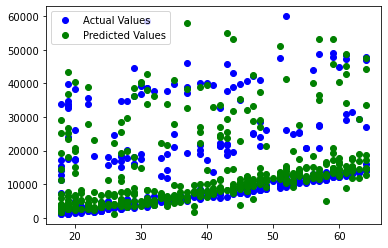

In [27]:
plt.plot(df_test['age'], test_y,'bo',label='Actual Values')
plt.plot(df_test['age'], predictions,'go',label='Predicted Values')
plt.legend()

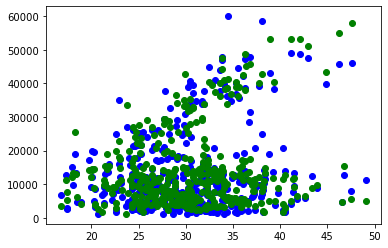

In [28]:
plt.plot(df_test['bmi'], test_y,'bo',label='Actual Values')
plt.plot(df_test['bmi'], predictions,'go',label='Predicted Values')

<AxesSubplot:ylabel='Density'>

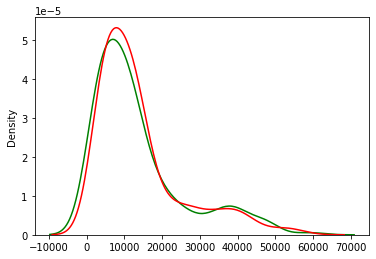

In [ ]:
sns.distplot(test_y, hist=False, color="g", label="Actual Values")
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" )

<AxesSubplot:ylabel='pr_error'>

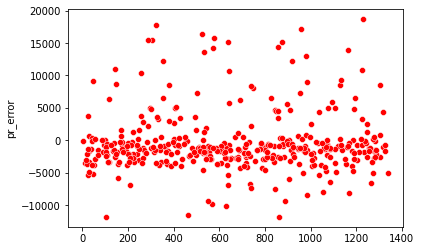

In [ ]:
sns.scatterplot(x=test_y.index,y='pr_error',data=df_test,color="r")

In [30]:
from sklearn import preprocessing

In [31]:
x =df.drop(['charges'], axis=1)
y =df[['charges']]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, random_state=100)

scaler = preprocessing.StandardScaler()

normalized_x= scaler.fit(train_x).transform(train_x)
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(normalized_x)

lr = linear_model.LinearRegression()
lr_model = lr.fit(x_poly, train_y)

test_x_poly = poly.transform(scaler.transform(test_x))

predictions = lr_model.predict(test_x_poly)
df_test['pr_nr_result'] = predictions

pr_error = test_y - predictions
df_test['pr_nr_error'] = pr_error

print ('Coefficients: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y.values) ** 2))
print("R2-score: %.2f" % r2_score(test_y.values , predictions) )




Coefficients:  [[ 2.56804538e+11 -6.08658593e+15 -6.46050848e+15 -1.11593494e+16
   6.68457511e+15  3.46991627e+15  4.36479812e+15 -1.06406236e+15
   9.00947189e+14  1.14512500e+03 -9.41484375e+01 -2.58390625e+02
  -3.51501646e+15 -1.11217883e+13 -1.86660382e+15  6.19806794e+14
  -2.19710001e+15 -6.55000000e+01  8.13125000e+01 -1.21718308e+15
  -3.16545978e+13  7.22324390e+14  4.38286009e+14 -2.42309744e+15
  -1.18250000e+02 -2.89658177e+15 -2.50981659e+13 -3.52759571e+15
  -3.57625876e+15  4.88685545e+14  2.25725686e+15 -1.68379086e+14
   1.13681744e+15 -7.73463197e+14  6.04088621e+14  2.07603738e+15
  -1.83839726e+15  1.13837573e+15  2.02291937e+15  4.00844393e+15
  -1.76536614e+15  6.43288456e+14 -2.45515962e+15  7.10745156e+14
   3.42356656e+15 -2.00750000e+02 -1.30250000e+02  6.23562500e+02
  -3.08250000e+02  5.80000000e+01  2.51125000e+02  2.33250000e+02
   5.95625000e+01 -6.50000000e+01  1.61125000e+02  2.03562500e+02
  -2.87375000e+02 -1.30500000e+02 -1.55750000e+02 -1.65375000

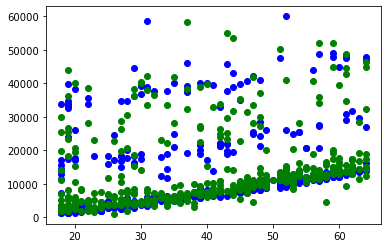

In [32]:
plt.plot(df_test['age'], test_y,'bo',label='Actual Values')
plt.plot(df_test['age'], predictions,'go',label='Predicted Values')

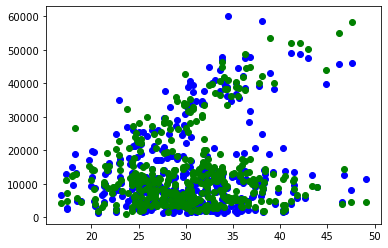

In [33]:
plt.plot(df_test['bmi'], test_y,'bo',label='Actual Values')
plt.plot(df_test['bmi'], predictions,'go',label='Predicted Values')

<AxesSubplot:ylabel='Density'>

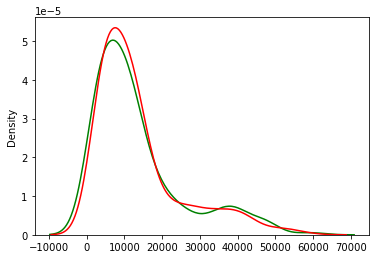

In [34]:
sns.distplot(test_y, hist=False, color="g", label="Actual Values")
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" )

<AxesSubplot:ylabel='pr_nr_error'>

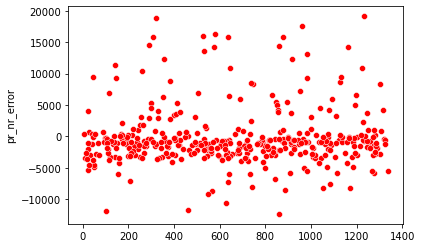

In [35]:
sns.scatterplot(x=test_y.index,y='pr_nr_error',data=df_test,color="r")

### Assumptions

###  Linearity

In [37]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [38]:

linear_X, linear_y = datasets.make_regression(n_samples=1000,
                                              n_features=5,
                                              noise=50, random_state=46)

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

In [40]:
pd.DataFrame(linear_X, columns=linear_feature_names)

,X1,X2,X3,X4,X5
0,-0.149128,0.043688,-1.784680,1.008772,0.026694
1,0.738774,-0.326680,0.341341,-0.011419,1.078121
2,-0.033586,0.399681,1.742667,-0.187443,0.512117
3,-0.158633,0.666355,-0.102781,0.439027,0.741037
4,0.207677,0.834544,-0.427071,-1.265001,-0.629515
...,...,...,...,...,...
995,0.492283,0.664940,0.338888,-1.197827,0.425514
996,-0.563983,1.942435,1.307086,-0.653813,1.304421
997,1.002093,-0.029841,-1.780086,0.295026,-2.084571
998,0.688528,-0.604938,0.495326,0.330561,0.568151


In [ ]:
# Fitting the model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Returning the R^2 for the model
linear_r2 = linear_model.score(linear_X, linear_y)
print('R^2: {0}'.format(linear_r2))

R^2: 0.8584696820886479


In [ ]:
data = pd.DataFrame(linear_X)
data.columns = linear_feature_names
data['target'] = linear_y

In [ ]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'target'], dtype='object')

### 1. Linearity

<Figure size 840x560 with 0 Axes>

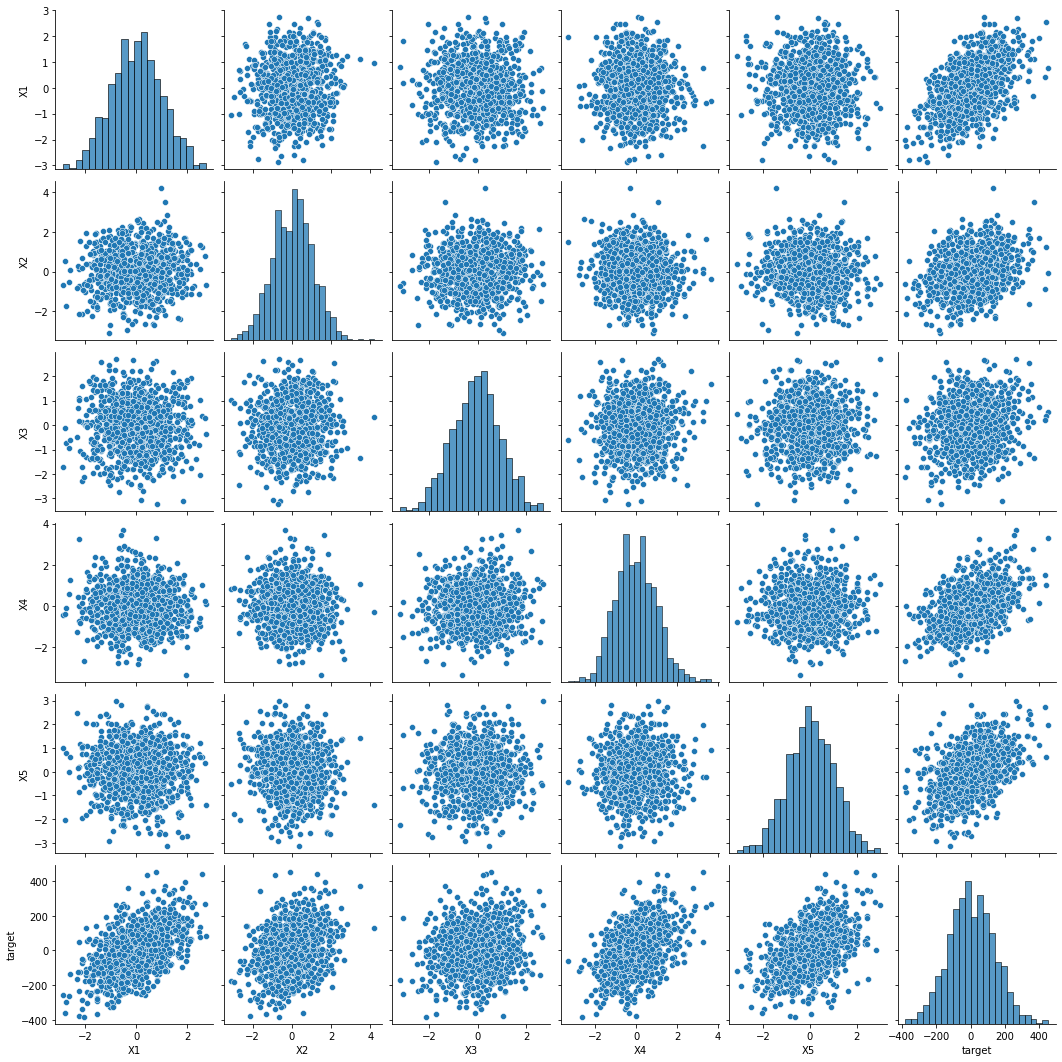

In [ ]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(data)

### 2. Error_Normality_Assumption

In [ ]:
pred = linear_model.predict(linear_X)
residuals = linear_y-pred


<AxesSubplot:ylabel='Density'>

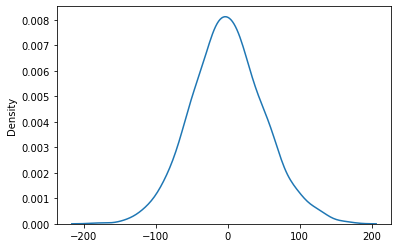

In [ ]:
sns.kdeplot(residuals)

In [ ]:
import statsmodels.api as sm 

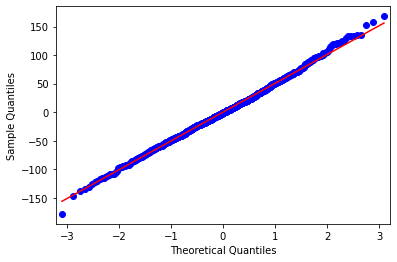

In [ ]:
#qq plot explain
sm.qqplot(residuals, line='s') 
plt.show() 

## 3. Homoescadicity

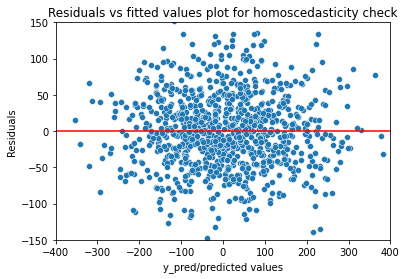

In [ ]:
p = sns.scatterplot(pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-150,150)
plt.xlim(-400,400)
p = sns.lineplot([-400,400],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

### 4. Multi Colinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
VIF = pd.Series([variance_inflation_factor(linear_X, i) for i in range(linear_X.shape[1])], index =linear_feature_names)

In [ ]:
VIF

X1    1.006423
X2    1.010042
X3    1.004173
X4    1.008837
X5    1.005928
dtype: float64

### Auto Correlation

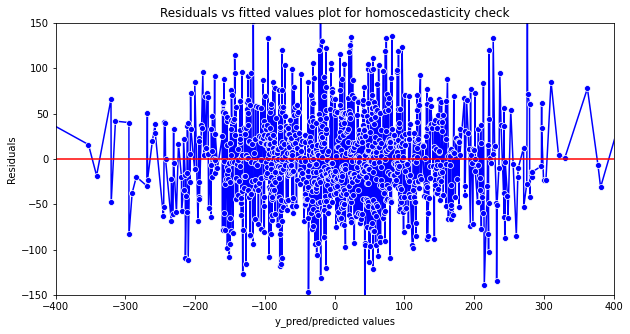

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-150,150)
plt.xlim(-400,400)
p = sns.lineplot([-400,400],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(residuals)
durbinWatson

1.9059142603562518